# 4.7 Combinar, juntar y agrupar DataFrames

## Combinar y juntar

<center>
<img src="imgs/pandas ejemplo join.png"  alt="drawing" width="70%"/>
</center>

El método fundamenteal es __concat__ aunque hay otros:

* __concat:__ combina los dataframes por filas y por columnas

* __join:__ combina los dataframes por filas

* __merge:__ combina los datos por columnas, como los join de de bases de datos

* __combine:__ combina los datos por columnas pudiendo realizar operaciones entre los elementos s) element-wise operations

* __append:__ añadir una fila a un dataframe

In [2]:
import pandas as pd
import numpy as np

Definimos los DataFrames

In [3]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)


df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)


df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)


### Concatenación básica por columnas

<left>
<img src="imgs/merging_concat_basic.png"  alt="drawing" width="25%"/>
</left>

In [4]:
frames = [df1, df2, df3]

result = pd.concat(frames)

result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


### Concatenación básica por filas

<left>
<img src="imgs/merging_concat_axis1.png"  alt="drawing" width="40%"/>
</left>

In [5]:
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


Usando el índice del primer dataframe (se queda solo con las filas del primer dataframe)

In [6]:
result = pd.concat([df1, df4], axis=1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


Concatenación por filas pero quedándonos solo con las filas comunes (join='inner')

<left>
<img src="imgs/merging_concat_axis1_inner.png"  alt="drawing" width="40%"/>
</left>

In [7]:
result = pd.concat([df1, df4], axis=1, join="inner")
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


Ignorando los índices

<left>
<img src="imgs/merging_concat_ignore_index.png"  alt="drawing" width="30%"/>
</left>

In [8]:
result = pd.concat([df1, df4], ignore_index=True, sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


Concatenando elementos con distintas dimensiones

<left>
<img src="imgs/merging_concat_mixed_ndim.png"  alt="drawing" width="40%"/>
</left>

In [10]:
s1 = pd.Series(["X0", "X1", "X2", "X3"], name="X")

result = pd.concat([df1, s1], axis=1)
result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


Añadir una fila a un DataFrame

<left>
<img src="imgs/merging_append_series_as_row.png"  alt="drawing" width="30%"/>
</left>

In [11]:
s2 = pd.Series(["X0", "X1", "X2", "X3"], index=["A", "B", "C", "D"])

result = pd.concat([df1, s2.to_frame().T], ignore_index=True)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


Existen otros comandos más del estilo SQL

<left>
<img src="imgs/pandas_df1_df4.png"  alt="drawing" width="30%"/>
</left>

In [17]:
pd.merge(df1, df4)

,A,B,C,D,F
0,A2,B2,C2,D2,F2
1,A3,B3,C3,D3,F3


In [18]:
pd.merge(df1, df4, how='left')

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,F2
3,A3,B3,C3,D3,F3


In [19]:
pd.merge(df1, df4, how='right')

,A,B,C,D,F
0,A2,B2,C2,D2,F2
1,A3,B3,C3,D3,F3
2,NaN,B6,NaN,D6,F6
3,NaN,B7,NaN,D7,F7


In [20]:
pd.merge(df1, df4, how='outer')

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,F2
3,A3,B3,C3,D3,F3
4,NaN,B6,NaN,D6,F6
5,NaN,B7,NaN,D7,F7


## Groupby

dataframe.groupby() es un método que sirve para dividir los datos en grupos basado en un criterio usando las filas o las columnas

In [9]:
nba_df = pd.read_csv("data/nba.csv")
nba_df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


¿Cómo funciona groupby?

* Se crean los grupos basados en un campo

* Se aplica una función a cada grupo (opcional)

<center>
<img src="imgs/pandas_groupby3.png"  alt="drawing" width="45%"/>
<img src="imgs/pandas_groupby4.png"  alt="drawing" width="27%"/>
</center>

Agrupemos los jugadores por equipo

In [21]:
team_df = nba_df.groupby('Team')
team_df.first().head()

,Name,Number,Position,Age,Height,Weight,College,Salary
Team,,,,,,,,
Atlanta Hawks,Kent Bazemore,24.0,SF,26.0,6-5,201.0,Old Dominion,2000000.0
Boston Celtics,Avery Bradley,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
Brooklyn Nets,Bojan Bogdanovic,44.0,SG,27.0,6-8,216.0,Oklahoma State,3425510.0
Charlotte Hornets,Nicolas Batum,5.0,SG,27.0,6-8,200.0,Virginia Commonwealth,13125306.0
Chicago Bulls,Cameron Bairstow,41.0,PF,25.0,6-9,250.0,New Mexico,845059.0


Podemos ver los datos de cada uno de los grupos creados

In [22]:
team_df.get_group('Boston Celtics')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0


Podemos agrupar basándonos en más de un criterio, por ejemplo, por equipo y posición:

In [23]:
team_pos_df = nba_df.groupby(['Team', 'Position'])
team_pos_df.first().head()

Name  Number   Age Height  Weight  \
Team          Position                                                  
Atlanta Hawks C               Al Horford    15.0  30.0   6-10   245.0   
              PF          Kris Humphries    43.0  31.0    6-9   235.0   
              PG         Dennis Schroder    17.0  22.0    6-1   172.0   
              SF           Kent Bazemore    24.0  26.0    6-5   201.0   
              SG        Tim Hardaway Jr.    10.0  24.0    6-6   205.0   

                             College      Salary  
Team          Position                            
Atlanta Hawks C              Florida  12000000.0  
              PF           Minnesota   1000000.0  
              PG         Wake Forest   1763400.0  
              SF        Old Dominion   2000000.0  
              SG            Michigan   1304520.0

Y ver los datos de uno de los grupos (pasado como una tupla)

In [24]:
team_pos_df.get_group(('Boston Celtics', 'C'))

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
10,Jared Sullinger,Boston Celtics,7.0,C,24.0,6-9,260.0,Ohio State,2569260.0
14,Tyler Zeller,Boston Celtics,44.0,C,26.0,7-0,253.0,North Carolina,2616975.0


In [24]:
team_weight = nba_df.groupby('Team')['Weight'].mean()
team_weight.head()

Team
Atlanta Hawks        221.266667
Boston Celtics       219.466667
Brooklyn Nets        215.600000
Charlotte Hornets    220.400000
Chicago Bulls        218.933333
Name: Weight, dtype: float64

In [37]:
result_nba = nba_df.groupby('Team').agg({'Weight': ['mean', 'min', 'max', np.std]})
result_nba.head()

Weight                         
                         mean    min    max        std
Team                                                  
Atlanta Hawks      221.266667  172.0  260.0  25.982045
Boston Celtics     219.466667  180.0  260.0  25.606547
Brooklyn Nets      215.600000  175.0  275.0  24.377390
Charlotte Hornets  220.400000  184.0  289.0  29.908909
Chicago Bulls      218.933333  161.0  275.0  29.336634

## PivotTables

<center>
<img src="imgs/pandas pivot table.png"  alt="drawing" width="45%"/>
</center>

Usando las columnas Position y Weight 

In [43]:
nba_df.pivot_table(index='Team', columns='Position', values='Weight', aggfunc=np.mean)

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,250.000000,239.500000,179.000000,210.500000,208.000000
Boston Celtics,250.333333,235.333333,193.750000,235.000000,206.250000
Brooklyn Nets,261.500000,219.500000,193.333333,NaN,208.833333
Charlotte Hornets,256.333333,244.000000,191.000000,232.000000,200.000000
Chicago Bulls,241.000000,240.000000,175.500000,212.500000,206.500000
Cleveland Cavaliers,257.666667,253.000000,196.333333,241.500000,213.400000
Dallas Mavericks,263.333333,240.500000,193.750000,215.000000,224.000000
Denver Nuggets,250.000000,231.500000,191.000000,208.333333,213.000000
Detroit Pistons,261.333333,237.500000,192.250000,222.500000,207.500000


In [46]:
nba_df.pivot_table(index='Team', columns='Position', values=['Weight', 'Age'], aggfunc=np.mean)

Age                                              \
Position                        C         PF         PG         SF         SG   
Team                                                                            
Atlanta Hawks           28.333333  28.250000  24.500000  29.000000  29.500000   
Boston Celtics          25.000000  26.333333  24.000000  25.000000  24.000000   
Brooklyn Nets           27.000000  24.750000  27.666667        NaN  24.666667   
Charlotte Hornets       25.666667  29.000000  26.666667  22.000000  25.200000   
Chicago Bulls           33.000000  24.800000  29.000000  24.000000  28.750000   
Cleveland Cavaliers     28.333333  30.000000  27.333333  33.000000  30.000000   
Dallas Mavericks        29.666667  31.250000  31.500000  27.500000  25.500000   
Denver Nuggets          22.000000  27.000000  27.333333  27.000000  25.750000   
Detroit Pistons         28.000000  28.500000  27.500000  22.750000  25.500000   
Golden State Warriors   28.333333  29.500000  29.000000  25.800000  28.000000   
Houston Rockets         30.000000  23.250000  27.000000  26.333333  29.250000   
Indiana Pacers          28.500000  24.000000  27.750000  26.666667  26.000000   
Los Angeles Clippers    27.000000  28.333333  31.000000  29.500000  30.666667   
Los Angeles Lakers      26.666667  25.000000  25.666667  31.750000  29.000000   
Memphis Grizzlies       31.000000  29.000000  25.600000  28.000000  31.333333   
Miami Heat              26.000000  32.500000  26.500000  29.000000  26.666667   
Milwaukee Bucks         26.500000  23.000000  25.250000  24.666667  24.000000   
Minnesota Timberwolves  25.333333  29.500000  22.000000  29.333333  21.000000   
New Orleans Pelicans    29.333333  26.666667  26.750000  27.000000  25.600000   
New York Knicks         27.000000  26.000000  28.500000  27.000000  27.250000   
Oklahoma City Thunder   28.000000  28.333333  24.000000  26.333333  27.500000   
Orlando Magic           25.500000  26.250000  26.000000  23.000000  22.666667   
Philadelphia 76ers      21.000000  26.600000  25.000000  23.500000  23.500000   
Phoenix Suns            26.000000  28.500000  26.750000  27.000000  21.666667   
Portland Trail Blazers  29.000000  21.333333  27.500000  24.000000  24.400000   
Sacramento Kings        24.666667  24.000000  29.000000  29.250000  26.250000   
San Antonio Spurs       34.250000  32.500000  33.666667  23.000000  31.250000   
Toronto Raptors         23.333333  30.250000  26.000000  24.666667  24.500000   
Utah Jazz               25.000000  24.000000  23.250000  26.666667  23.500000   
Washington Wizards      30.666667  30.000000  27.500000  25.500000  27.250000   

                            Weight                                      \
Position                         C          PF          PG          SF   
Team                                                                     
Atlanta Hawks           250.000000  239.500000  179.000000  210.500000   
Boston Celtics          250.333333  235.333333  193.750000  235.000000   
Brooklyn Nets           261.500000  219.500000  193.333333         NaN   
Charlotte Hornets       256.333333  244.000000  191.000000  232.000000   
Chicago Bulls           241.000000  240.000000  175.500000  212.500000   
Cleveland Cavaliers     257.666667  253.000000  196.333333  241.500000   
Dallas Mavericks        263.333333  240.500000  193.750000  215.000000   
Denver Nuggets          250.000000  231.500000  191.000000  208.333333   
Detroit Pistons         261.333333  237.500000  192.250000  222.500000   
Golden State Warriors   260.000000  251.500000  191.000000  224.000000   
Houston Rockets         245.000000  238.500000  192.500000  226.666667   
Indiana Pacers          242.500000  249.500000  192.000000  225.333333   
Los Angeles Clippers    257.500000  243.666667  186.666667  227.500000   
Los Angeles Lakers      263.333333  240.000000  196.333333  223.000000   
Memphis Grizzlies       255.000000  241.833333  178.000000  228.666667   
Miami Heat              

Podemos dibujar la pivot table

<AxesSubplot:title={'center':'Peso medio por posición'}, xlabel='Team'>

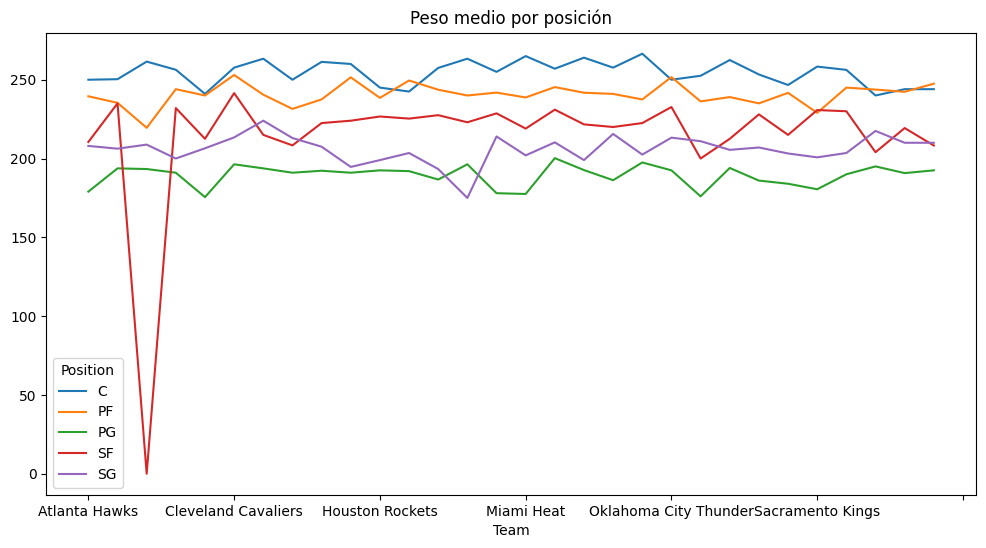

In [53]:
nba_df.pivot_table(index='Team', columns='Position', values='Weight', aggfunc=np.mean, fill_value=0).plot(figsize=(12, 6), title='Peso medio por posición')

<AxesSubplot:title={'center':'Peso medio por posición'}, ylabel='Team'>

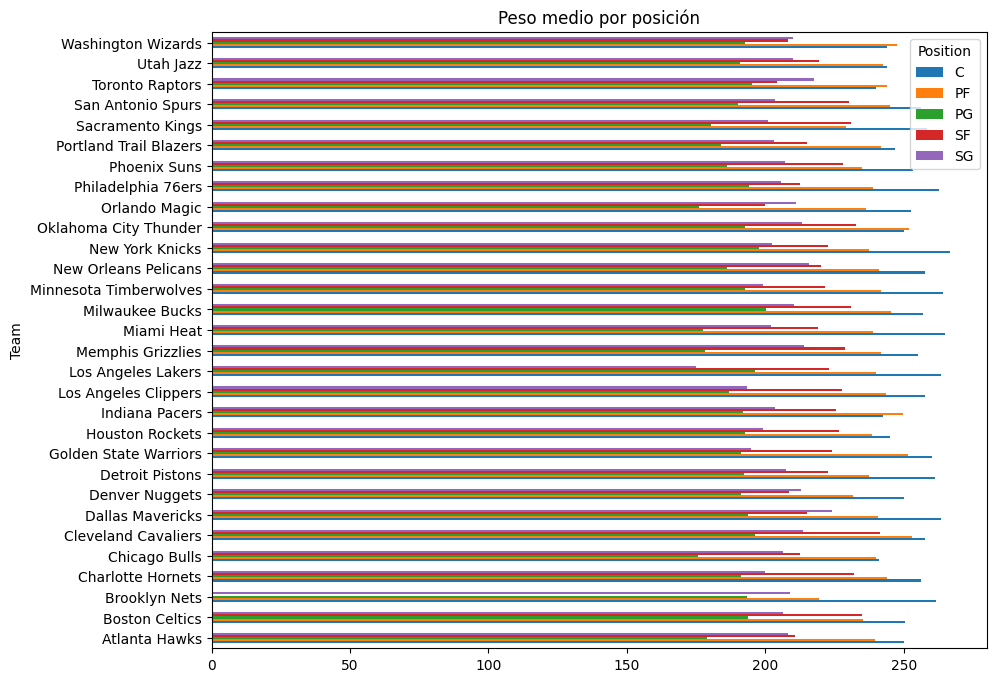

In [54]:
nba_df.pivot_table(index='Team', columns='Position', values='Weight', aggfunc=np.mean, fill_value=0).plot.barh(figsize=(10,8), title='Peso medio por posición')

___
# Ejercicios

**1** Lee los datos del fichero drinks.csv y guárdalo en un dataframe

**2** Calcula el total de  cervezas servidas por continente 

**3** Calcula el mínimo, máximo y desviación típica de los vinos servidos en cada país de europa